This is a classification task: We have a set of data that we want to use to calculate a binary outcome. Regression is used to predict continuous variables

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [10]:
from matplotlib import rcParams 
rcParams['figure.figsize'] = 15, 5 
sns.set_style('darkgrid')
pd.options.display.float_format = "{:,.4f}".format

In [11]:
heart_data = pd.read_csv('data.csv') 
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6000,2,0,2,1


In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [8]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From this we can see that there are 303 total observations or rows in this dataset. It contains no missing values. As we can see from heart_data.nunique() there are 41 unique values for age, 2 for sex, 4 for cp, 49 for trtbps, 152 for chol, 2 for fbs, 3 for restecg, 91 for thalachh, 2 for exng, 40 for oldpeak, 3 for slp, 5 for caa, 4 for thall, and 2 for output. I will take sex, chest pain type, fasting blood sugar, resting ecg, exercise induced angia, slope, caa, thall, and output as categorical data because all the data takes 5 or fewer distinct values for these variables

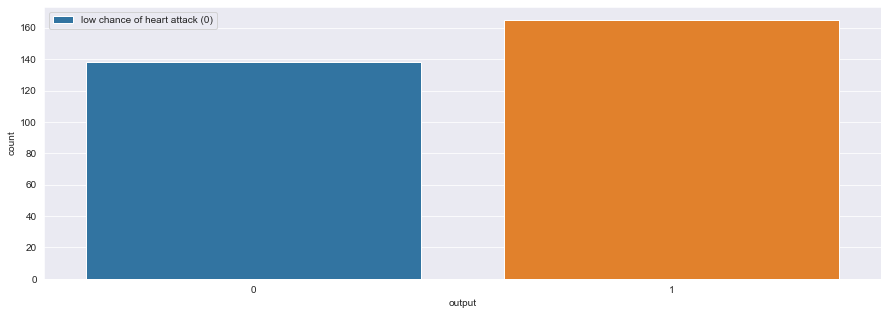

In [42]:
sns.countplot(x=heart_data['output'])
risk = ['low chance of heart attack (0)', 'high chance of heart attack (1)']
plt.legend(risk)

The dataset is relatively balanced. The difference in outcomes is only about 20 out of 300 which would not make for a significant change in our model. Working with balanced data is crucial for modeling, without balance you cannot draw proper outcomes from data. Certain groups or attribute may be under or over represented thus swaying the data and invalidating your analysis.<br>
You can deal with unbalanced data in many ways. You can take the unbalanced data as is and use models and algorithms that are more resistant to outliers and skewed data. This can take some trial and error. You should also use performance metrics when working with these sets, like the confusion matrix or F1 score. Another good technique is resampling or oversampling which you can do with scikit

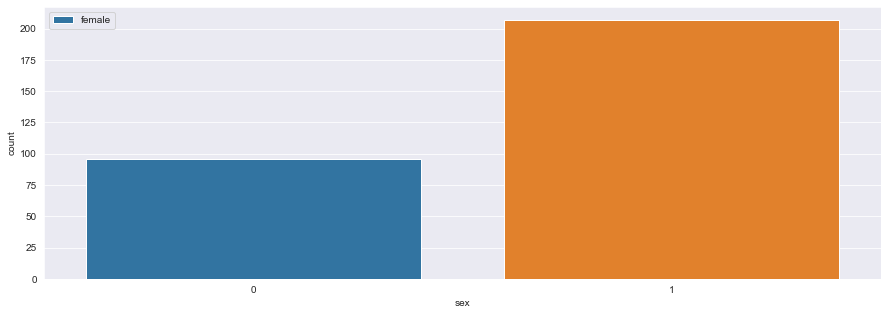

In [73]:
ax = sns.countplot(x=heart_data['sex'])
plt.legend({'female':0, 'male':1})
#Legend isn't working it only shows 1 label and I don't know why: the documentation is garbage

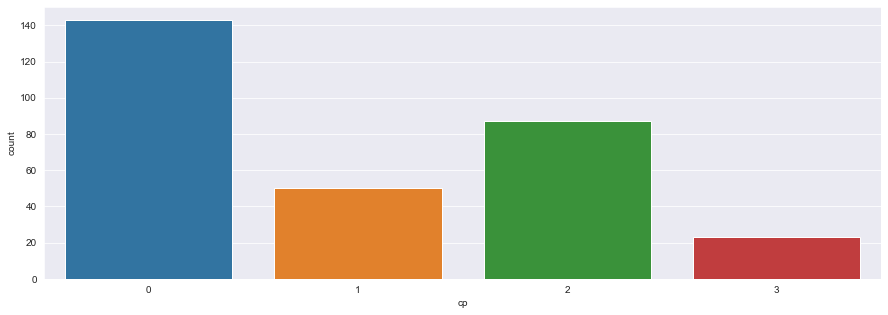

In [75]:
ax = sns.countplot(x=heart_data['cp'])

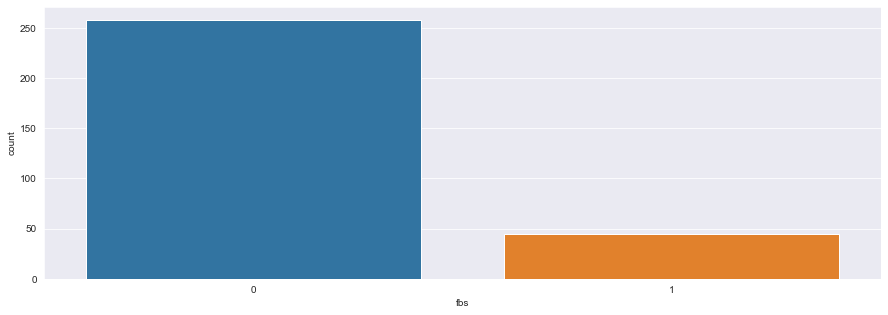

In [76]:
ax = sns.countplot(x=heart_data['fbs'])

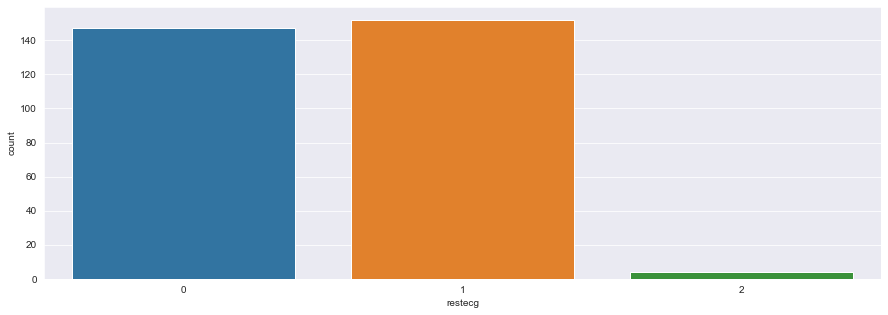

In [77]:
ax = sns.countplot(x=heart_data['restecg'])

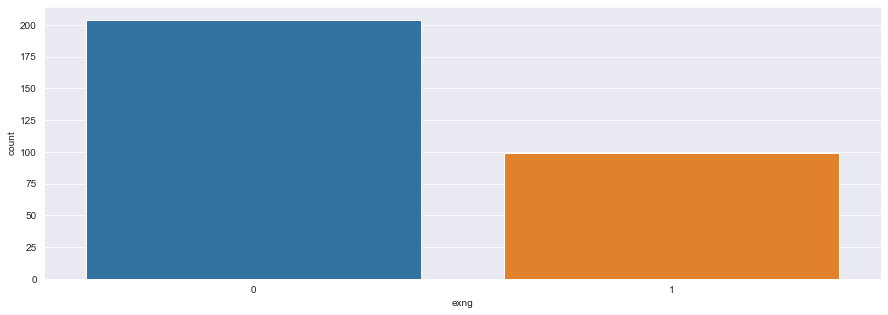

In [78]:
ax = sns.countplot(x=heart_data['exng'])

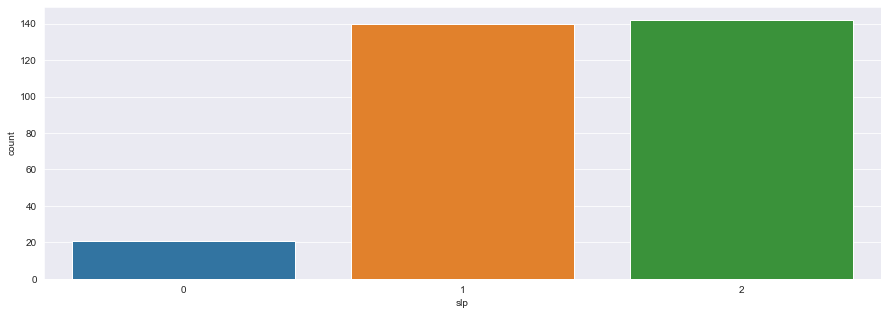

In [79]:
ax = sns.countplot(x=heart_data['slp'])

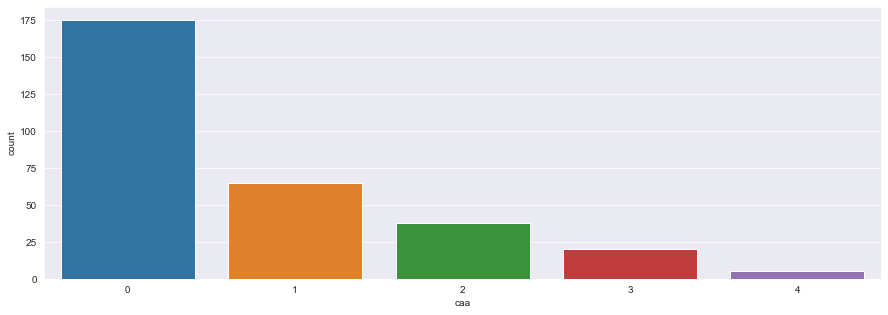

In [80]:
ax = sns.countplot(x=heart_data['caa'])

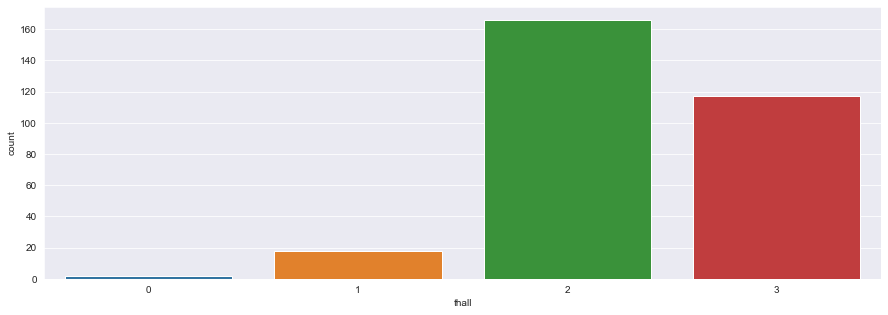

In [81]:
ax = sns.countplot(x=heart_data['thall'])

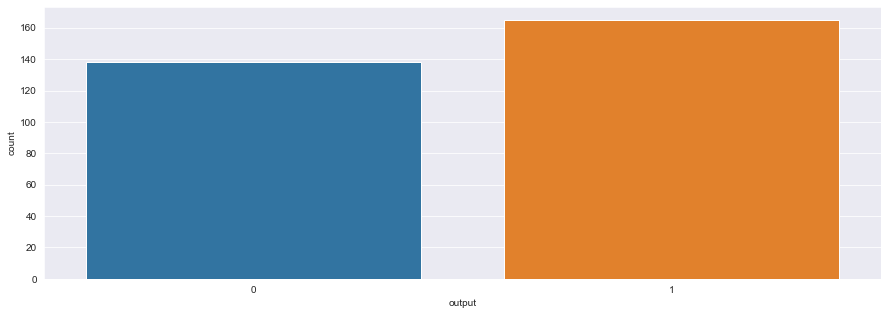

In [82]:
ax = sns.countplot(x=heart_data['output'])

These categorical variables range from very balanced to not balanced at all. I would consider sex, exng, and output to be balanced enough. And cp, fbs, restecg, slp, caa, and thall to be relatively unbalanced.<br>

Restecg is very balanced if you only consider values 0 and 1 but has a massive difference in the number of observations of value 2. Slp is similar though to not as large of an extent.<br>

Caa seems to follow a nice logarithmic curve as you go from 0 to 4<br>

and finally Thall has a good number of observations for 2 and 3 but few for 1 and only a couple for 0

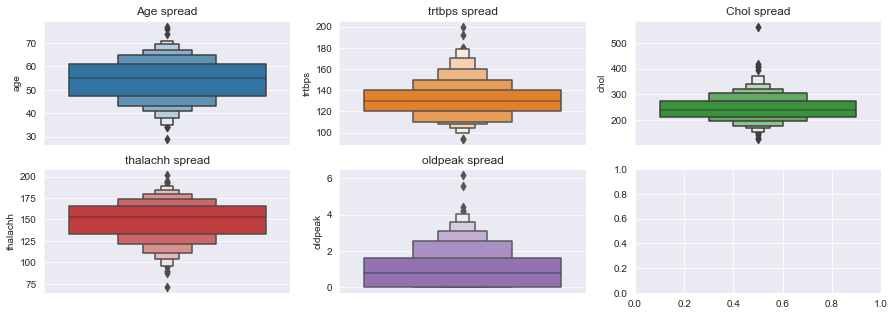

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))

sns.boxenplot(y=heart_data['age'], ax=axes[0][0])
axes[0][0].set_title('Age spread')

sns.boxenplot(y=heart_data['trtbps'], color='tab:orange', ax=axes[0][1])
axes[0][1].set_title('trtbps spread')

sns.boxenplot(y=heart_data['chol'], color='tab:green', ax=axes[0][2])
axes[0][2].set_title('Chol spread')

sns.boxenplot(y=heart_data['thalachh'], color='tab:red', ax=axes[1][0])
axes[1][0].set_title('thalachh spread')

sns.boxenplot(y=heart_data['oldpeak'], color='tab:purple', ax=axes[1][1])
axes[1][1].set_title('oldpeak spread')

plt.show()

All of these plot had much more centralization than I expected, it seems like there is a good range for some of these values and somewhat little deviation (Cholesterol)